In [20]:
import pandas as pd
weather=pd.read_csv("weatherdata.csv", index_col="DATE")

In [21]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,,
2013-03-01,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.09,0.9,3.5,NaN,34.0,30.0,NaN,NaN
2013-03-02,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.10,1.2,3.5,NaN,33.0,24.0,NaN,NaN
2013-03-03,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.05,0.6,4.7,NaN,29.0,23.0,NaN,NaN
2013-03-04,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.08,0.7,4.3,NaN,25.0,19.0,NaN,NaN
2013-03-05,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.04,0.2,4.7,NaN,35.0,24.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-30,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-31,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.00,0.0,NaN,49.0,60.0,38.0,NaN,NaN
2022-11-01,CA007025251,"MONTREAL INTERNATIONAL A, QC CA",0.11,0.0,NaN,52.0,58.0,46.0,28.0,71.6


In [22]:
weather.apply(pd.isnull).sum()/weather.shape[0]


STATION    0.000000
NAME       0.000000
PRCP       0.007135
SNOW       0.008847
SNWD       0.676941
TAVG       0.214612
TMAX       0.005422
TMIN       0.004281
WDFG       0.297089
WSFG       0.311358
dtype: float64

In [28]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [30]:
core_weather.apply(pd.isnull).sum()

precip          25
snow            31
snow_depth    2372
temp_max        19
temp_min        15
dtype: int64

In [31]:
core_weather["snow"].value_counts()

0.0     2963
0.2       91
0.1       67
0.6       30
0.3       23
        ... 
2.6        1
4.2        1
15.4       1
5.0        1
6.5        1
Name: snow, Length: 71, dtype: int64

In [32]:
core_weather["snow_depth"].value_counts()


0.0     205
2.0      80
0.8      68
1.6      66
3.9      63
0.4      57
1.2      57
2.4      46
4.3      45
2.8      43
3.1      40
4.7      30
6.3      29
3.5      27
7.1      26
5.5      25
5.9      23
7.5      18
5.1      18
11.0     17
8.3      17
6.7      14
7.9      13
9.1      13
8.7      10
9.4      10
11.4      9
9.8       9
10.6      7
13.8      7
10.2      6
11.8      6
13.0      5
15.4      5
12.6      3
12.2      3
14.2      3
15.7      3
16.1      2
15.0      1
16.5      1
14.6      1
13.4      1
Name: snow_depth, dtype: int64

In [33]:
del core_weather["snow"]

In [34]:
del core_weather["snow_depth"]

In [35]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
2013-12-15,NaN,NaN,NaN
2013-12-18,NaN,NaN,NaN
2013-12-19,NaN,NaN,NaN
2013-12-21,NaN,20.0,NaN
2013-12-24,NaN,NaN,NaN
2014-11-25,NaN,46.0,36.0
2014-12-29,NaN,31.0,12.0
2015-01-27,NaN,15.0,3.0
2015-03-22,NaN,16.0,4.0


In [37]:
core_weather.loc["2018-12-15",:]

precip       0.0
temp_max    41.0
temp_min    28.0
Name: 2018-12-15, dtype: float64

In [38]:
core_weather["precip"].value_counts() / core_weather.shape[0]


0.00    0.545947
0.02    0.059361
0.01    0.039098
0.06    0.023687
0.09    0.017979
          ...   
1.19    0.000285
1.25    0.000285
1.32    0.000285
0.74    0.000285
0.95    0.000285
Name: precip, Length: 149, dtype: float64

In [39]:
core_weather["precip"] = core_weather["precip"].fillna(0)


In [40]:
core_weather.apply(pd.isnull).sum()


precip       0
temp_max    19
temp_min    15
dtype: int64

In [41]:
core_weather[pd.isnull(core_weather["temp_min"])]


,precip,temp_max,temp_min
DATE,,,
2013-12-15,0.00,NaN,NaN
2013-12-18,0.00,NaN,NaN
2013-12-19,0.00,NaN,NaN
2013-12-21,0.00,20.0,NaN
2013-12-24,0.00,NaN,NaN
2019-06-17,0.00,NaN,NaN
2019-06-18,0.00,NaN,NaN
2019-06-19,0.00,NaN,NaN
2019-07-01,0.00,NaN,NaN


In [43]:
core_weather.loc["2013-12-21":"2013-12-24"]

,precip,temp_max,temp_min
DATE,,,
2013-12-21,0.00,20.0,NaN
2013-12-22,0.84,19.0,15.0
2013-12-23,0.02,22.0,15.0
2013-12-24,0.00,NaN,NaN


In [44]:
core_weather = core_weather.fillna(method="ffill")


In [45]:
core_weather.apply(pd.isnull).sum()


precip      0
temp_max    0
temp_min    0
dtype: int64

In [46]:
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [47]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [48]:
core_weather.index

Index(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04', '2013-03-05',
       '2013-03-06', '2013-03-07', '2013-03-08', '2013-03-09', '2013-03-10',
       ...
       '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
       '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03'],
      dtype='object', name='DATE', length=3504)

In [49]:
core_weather.index = pd.to_datetime(core_weather.index)


In [50]:
core_weather.index

DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08',
               '2013-03-09', '2013-03-10',
               ...
               '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03'],
              dtype='datetime64[ns]', name='DATE', length=3504, freq=None)

In [51]:
core_weather.index.year

Int64Index([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=3504)

<AxesSubplot: xlabel='DATE'>

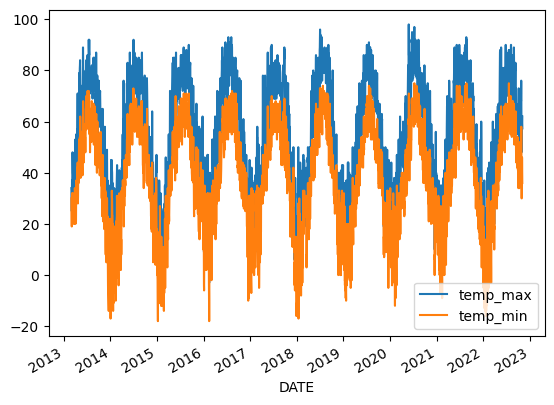

In [58]:
core_weather[["temp_max", "temp_min"]].plot()

In [59]:
core_weather.index.year.value_counts().sort_index()


2013    282
2014    365
2015    363
2016    366
2017    360
2018    365
2019    365
2020    366
2021    365
2022    307
Name: DATE, dtype: int64

<AxesSubplot: xlabel='DATE'>

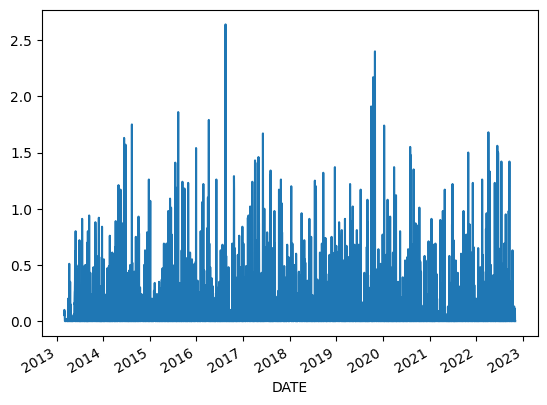

In [60]:
core_weather["precip"].plot()


<AxesSubplot: xlabel='DATE'>

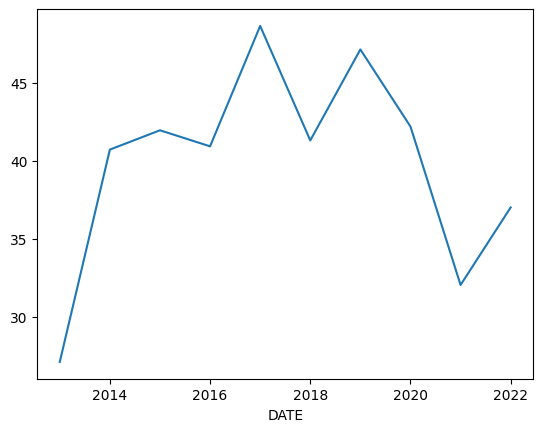

In [61]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()


In [62]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]


In [63]:
core_weather


,precip,temp_max,temp_min,target
DATE,,,,
2013-03-01,0.09,34.0,30.0,33.0
2013-03-02,0.10,33.0,24.0,29.0
2013-03-03,0.05,29.0,23.0,25.0
2013-03-04,0.08,25.0,19.0,35.0
2013-03-05,0.04,35.0,24.0,37.0
...,...,...,...,...
2022-10-30,0.00,57.0,30.0,60.0
2022-10-31,0.00,60.0,38.0,58.0
2022-11-01,0.11,58.0,46.0,57.0


In [64]:
core_weather = core_weather.iloc[:-1,:].copy()


In [65]:
core_weather


,precip,temp_max,temp_min,target
DATE,,,,
2013-03-01,0.09,34.0,30.0,33.0
2013-03-02,0.10,33.0,24.0,29.0
2013-03-03,0.05,29.0,23.0,25.0
2013-03-04,0.08,25.0,19.0,35.0
2013-03-05,0.04,35.0,24.0,37.0
...,...,...,...,...
2022-10-29,0.00,57.0,30.0,57.0
2022-10-30,0.00,57.0,30.0,60.0
2022-10-31,0.00,60.0,38.0,58.0
